In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import urllib.request as req

In [2]:
url = 'https://www.rottentomatoes.com/franchise/star_wars_saga'
html = req.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [6]:
franchise_starwars = soup.find(class_='franchise-media-list js-franchise-media-list')

In [9]:
[e.text.strip().replace('\n','') for e in franchise_starwars.find_all(class_='franchise-media-list__h3')]

['Andor (2022 - Present)',
 'Obi-Wan Kenobi (2022 - Present)',
 'The Book of Boba Fett (2021 - Present)',
 'Star Wars: The Bad Batch (2021 - Present)',
 'Star Wars: The Rise of Skywalker (2019)',
 'The Mandalorian (2019 - Present)',
 'Star Wars Resistance (2018 - Present)',
 'Solo: A Star Wars Story (2018)',
 'Star Wars: The Last Jedi (2017)',
 'Rogue One: A Star Wars Story (2016)',
 'Star Wars: The Force Awakens (2015)',
 'Star Wars Rebels (2014 - 2018)',
 'Star Wars: The Clone Wars (2008 - 2020)',
 'Star Wars: The Clone Wars (2008)',
 'Star Wars: Episode III -- Revenge of the Sith (2005)',
 'Star Wars: Clone Wars (2003)',
 'Star Wars: Episode II -- Attack of the Clones (2002)',
 'Star Wars: Episode I -- The Phantom Menace (1999)',
 'Star Wars: Episode VI -- Return of the Jedi (1983)',
 'Star Wars: Episode V -- The Empire Strikes Back (1980)',
 'Star Wars: Episode IV -- A New Hope (1977)']

In [12]:
url = 'https://www.rottentomatoes.com/m/star_wars_the_rise_of_skywalker/reviews?type=user'
html = req.urlopen(url)
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html dir="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<script src="/assets/pizza-pie/javascripts/bundles/roma/rt-common.js?single"></script>
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Star Wars: The Rise of Skywalker - Movie Reviews</title>
<meta content="Rotten Tomatoes, home of the Tomatometer, is the most trusted measurement of quality for Movies &amp; TV. The definitive site for Reviews, Trailers, Showtimes, and Tickets" name="description"/>
<link href="https://www.rottentomatoes.com/m/star_wars_the_rise_of_skywalker" rel="canonical"/>
<link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="sh

In [115]:
reviews =[e.text.strip() for e in soup.find_all(class_='audience-reviews__review js-review-text clamp clamp-8 js-clamp')]
reviews

['The character assassination, mishandling and plot holes are so sad. Sadly, this has what happened to Star Wars.',
 'The movie was awesome !',
 'This movie could have been great but the only problem with it is the fact that it is a conclusive chapter. Its basically making a Endgame without an infinity war. There is no movie setting up Palpatine\'s Return. Its just bam Palpatine is there. You may argue they said what happened between movies setting up his return in marketing. but that "marketing" was in a Fortnite event..',
 "I've always understood that the new saga was meant for kids but it is still poorly executed. The saga has no direction, unnecessary/unrealistic dialogue, confusing backstories, and to wrap it up... Rey buries Luke and Anakin's lightsabers in the sand for NO REASON except to show off the two yellow lightsabers she acquired somewhere offscreen. My recommendation, get drunk and enjoy the visuals.. because that's all these movies are good for.",
 'A terrible mess with

In [80]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

text = ['I am a fan of Woo Lae Oak and have been patiently waiting to try The Woo. Food is just as good.',
 'Very yummy and piping hot! I loved the food and would recommend!']

nltk_stopwords = set(stopwords.words('english'))
my_stopwords = ['woo', 'lae', 'oak']
new_stopwords = nltk_stopwords.union(my_stopwords)


ps = PorterStemmer()

def my_tokenizer(r):
    r1 = word_tokenize(r)
    r2 = [w.lower() for w in r1 if w.isalpha()]
    r3 = [w for w in r2 if w not in new_stopwords]
    r4 = [wnl.lemmatize(w) for w in r3]
    return r4
    
cv = CountVectorizer(tokenizer=my_tokenizer)
cv_result = cv.fit_transform(text)


cv_array = cv_result.toarray()
cv_term = cv.get_feature_names()
df = pd.DataFrame(cv_array, columns=cv_term)
df

,fan,food,good,hot,loved,patiently,piping,recommend,try,waiting,would,yummy
0,1,1,1,0,0,1,0,0,1,1,0,0
1,0,1,0,1,1,0,1,1,0,0,1,1


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=my_tokenizer, ngram_range=range(1,3))

In [82]:
tfidf_result = tfidf.fit_transform(reviews)
tfidf_array = tfidf_result.toarray()
tfidf_term = tfidf.get_feature_names()

import pandas as pd

df_tfidf = pd.DataFrame(tfidf_array, columns=tfidf_term)
df_tfidf

,absolutely,absolutely awful,abundance,abundance plot,acquired,acquired somewhere,actor,actor feeling,admit,admit movie,also,also abundance,always,always chosen,always understood,anakin,anakin lightsabers,anakin skywalker,argue,argue said,assassination,assassination mishandling,awesome,awful,awful movie,backstories,backstories wrap,bad,bad characterization,bad ever,bad story,bad trilogy,bad writing,bam,bam palpatine,basically,basically making,beautiful,beautiful moment,boring,...,trilogy,trilogy wtf,two,two yellow,unclear,unclear direction,understood,understood new,useless,useless ton,visuals,visuals movie,war,war anakin,war fan,war film,war movie,war point,war rise,way,way end,well,well many,whole,whole franchise,without,without infinity,worst,worst film,worst star,worthy,worthy label,wrap,wrap rey,writing,writing bad,wtf,wtf even,yellow,yellow lightsabers
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.251769,0.251769,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135157,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.661081,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122124,0.122124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122124,0.122124,0.122124,0.122124,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065560,0.000000,0.00000,0.000000,0.103817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.122124,0.122124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.115333,0.115333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098043,0.000000,0.115333,0.098043,0.115333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115333,0.115333,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.115333,0.115333,0.000000,0.000000,0.115333,0.115333,0.000000,0.000000,0.115333,0.115333,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115333,0.115333,0.000000,0.000000,0.000000,0.000000,0.115333,0.115333
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

sen = [vader.polarity_scores(reviews[i]) for i in range(len(reviews))]

In [84]:
df_sen = pd.DataFrame(sen)
df_sen

,neg,neu,pos,compound
0,0.510,0.490,0.000,-0.9389
1,0.000,0.406,0.594,0.6588
2,0.126,0.784,0.090,-0.3981
3,0.142,0.762,0.096,-0.4587
4,0.448,0.240,0.312,-0.1779
5,0.152,0.785,0.064,-0.6917
6,0.456,0.544,0.000,-0.9144
7,0.535,0.465,0.000,-0.3182
8,0.252,0.714,0.034,-0.9902
9,0.376,0.483,0.141,-0.7783


In [117]:
words = [list(df_tfidf.iloc[i,:].sort_values(ascending=False).head(5).index) for i in range(len(reviews))]

df_words = pd.DataFrame(words, columns=['1st','2nd', '3rd','4th','5th'])

pd.concat([df_sen['compound'], df_words], axis=1)

,compound,1st,2nd,3rd,4th,5th
0,-0.9389,hole sad,character assassination,assassination,happened star,assassination mishandling
1,0.6588,awesome,movie awesome,movie,offscreen,potential however
2,-0.3981,return,marketing,movie setting,setting,palpatine
3,-0.4587,saga,lightsabers,luke,kid,offscreen
4,-0.1779,mess beautiful,beautiful moment,beautiful,terrible mess,terrible
5,-0.6917,bad,movie,characterization good,bad story,bad writing
6,-0.9144,star,star war,war,movie,made
7,-0.3182,boring forgettable,boring,forgettable,absolutely,part make
8,-0.9902,film,franchise,worst,entire,time
9,-0.7783,war point,trilogy,even disney,wtf even,wtf


In [119]:
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(tfidf_result)
cs

array([[1.        , 0.        , 0.03108039, 0.        , 0.        ,
        0.01054886, 0.15509194, 0.        , 0.1150717 , 0.06868694],
       [0.        , 1.        , 0.06979875, 0.0219724 , 0.        ,
        0.0553971 , 0.10094143, 0.        , 0.01466261, 0.        ],
       [0.03108039, 0.06979875, 1.        , 0.01217714, 0.        ,
        0.03581804, 0.09796936, 0.        , 0.01354341, 0.02896762],
       [0.        , 0.0219724 , 0.01217714, 1.        , 0.        ,
        0.04601731, 0.01761032, 0.        , 0.00897265, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.03210167, 0.        , 0.        , 0.05618847, 0.        ],
       [0.01054886, 0.0553971 , 0.03581804, 0.04601731, 0.03210167,
        1.        , 0.06659905, 0.        , 0.06810459, 0.06644427],
       [0.15509194, 0.10094143, 0.09796936, 0.01761032, 0.        ,
        0.06659905, 1.        , 0.        , 0.12130662, 0.14454918],
       [0.        , 0.        , 0.       

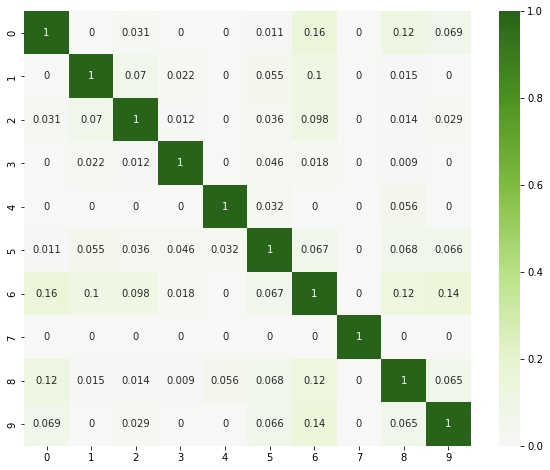

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(cs, vmin=0, vmax=1, annot=True, center=0, cmap='PiYG')
plt.show()

In [123]:
sw1 = """Obi-Wan Kenobi (Ewan McGregor) is a young apprentice Jedi knight under the tutelage of Qui-Gon Jinn (Liam Neeson) ; Anakin Skywalker (Jake Lloyd), who will later father Luke Skywalker and become known as Darth Vader, is just a 9-year-old boy. When the Trade Federation cuts off all routes to the planet Naboo, Qui-Gon and Obi-Wan are assigned to settle the matter."""
sw2 = """Set ten years after the events of "The Phantom Menace," the Republic continues to be mired in strife and chaos. A separatist movement encompassing hundreds of planets and powerful corporate alliances poses new threats to the galaxy that even the Jedi cannot stem. These moves, long planned by an as yet unrevealed and powerful force, lead to the beginning of the Clone Wars -- and the beginning of the end of the Republic."""
sw3 = """It has been three years since the Clone Wars began. Jedi Master Obi-Wan Kenobi (Ewan McGregor) and Jedi Knight Anakin Skywalker (Hayden Christensen) rescue Chancellor Palpatine (Ian McDiarmid) from General Grievous, the commander of the droid armies, but Grievous escapes. Suspicions are raised within the Jedi Council concerning Chancellor Palpatine, with whom Anakin has formed a bond. Asked to spy on the chancellor, and full of bitterness toward the Jedi Council, Anakin embraces the Dark Side."""
sw4 = """The Imperial Forces -- under orders from cruel Darth Vader (David Prowse) -- hold Princess Leia (Carrie Fisher) hostage, in their efforts to quell the rebellion against the Galactic Empire. Luke Skywalker (Mark Hamill) and Han Solo (Harrison Ford), captain of the Millennium Falcon, work together with the companionable droid duo R2-D2 (Kenny Baker) and C-3PO (Anthony Daniels) to rescue the beautiful princess, help the Rebel Alliance, and restore freedom and justice to the Galaxy."""
sw5 = """The adventure continues in this "Star Wars" sequel. Luke Skywalker (Mark Hamill), Han Solo (Harrison Ford), Princess Leia (Carrie Fisher) and Chewbacca (Peter Mayhew) face attack by the Imperial forces and its AT-AT walkers on the ice planet Hoth. While Han and Leia escape in the Millennium Falcon, Luke travels to Dagobah in search of Yoda. Only with the Jedi master's help will Luke survive when the dark side of the Force beckons him into the ultimate duel with Darth Vader (David Prowse)."""
sw6 = """Luke Skywalker (Mark Hamill) battles horrible Jabba the Hut and cruel Darth Vader to save his comrades in the Rebel Alliance and triumph over the Galactic Empire. Han Solo (Harrison Ford) and Princess Leia (Carrie Fisher) reaffirm their love and team with Chewbacca, Lando Calrissian (Billy Dee Williams), the Ewoks and the androids C-3PO and R2-D2 to aid in the disruption of the Dark Side and the defeat of the evil emperor."""
sw7 = """Thirty years after the defeat of the Galactic Empire, the galaxy faces a new threat from the evil Kylo Ren (Adam Driver) and the First Order. When a defector named Finn crash-lands on a desert planet, he meets Rey (Daisy Ridley), a tough scavenger whose droid contains a top-secret map. Together, the young duo joins forces with Han Solo (Harrison Ford) to make sure the Resistance receives the intelligence concerning the whereabouts of Luke Skywalker (Mark Hamill), the last of the Jedi Knights."""
sw8 = """Luke Skywalker's peaceful and solitary existence gets upended when he encounters Rey, a young woman who shows strong signs of the Force. Her desire to learn the ways of the Jedi forces Luke to make a decision that changes their lives forever. Meanwhile, Kylo Ren and General Hux lead the First Order in an all-out assault against Leia and the Resistance for supremacy of the galaxy."""
sw9 = """When it's discovered that the evil Emperor Palpatine did not die at the hands of Darth Vader, the rebels must race against the clock to find out his whereabouts. Finn and Poe lead the Resistance to put a stop to the First Order's plans to form a new Empire, while Rey anticipates her inevitable confrontation with Kylo Ren. Warning: Some flashing-lights scenes in this film may affect photosensitive viewers."""

In [125]:
sw = [sw1, sw2, sw3, sw4, sw5, sw6, sw7, sw8, sw9]
sw

['Obi-Wan Kenobi (Ewan McGregor) is a young apprentice Jedi knight under the tutelage of Qui-Gon Jinn (Liam Neeson) ; Anakin Skywalker (Jake Lloyd), who will later father Luke Skywalker and become known as Darth Vader, is just a 9-year-old boy. When the Trade Federation cuts off all routes to the planet Naboo, Qui-Gon and Obi-Wan are assigned to settle the matter.',
 'Set ten years after the events of "The Phantom Menace," the Republic continues to be mired in strife and chaos. A separatist movement encompassing hundreds of planets and powerful corporate alliances poses new threats to the galaxy that even the Jedi cannot stem. These moves, long planned by an as yet unrevealed and powerful force, lead to the beginning of the Clone Wars -- and the beginning of the end of the Republic.',
 'It has been three years since the Clone Wars began. Jedi Master Obi-Wan Kenobi (Ewan McGregor) and Jedi Knight Anakin Skywalker (Hayden Christensen) rescue Chancellor Palpatine (Ian McDiarmid) from Gene

In [176]:
from bs4 import BeautifulSoup
import urllib.request as req
from selenium import webdriver
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns


def my_tokenizer_stem(r):
    r1 = word_tokenize(r)
    r2 = [w.lower() for w in r1 if w.isalpha()]
    r3 = [w for w in r2 if w not in new_stopwords]
    r4 = [ps.stem(w) for w in r3]
    return r4

def my_tokenizer_lemm(r):
    r1 = word_tokenize(r)
    r2 = [w.lower() for w in r1 if w.isalpha()]
    r3 = [w for w in r2 if w not in new_stopwords]
    r4 = [wnl.lemmatize(w) for w in r3]
    return r4

def get_tfidf_fitted_result(list_data):
    tfidf_fitted_result = tfidf_lemm.fit_transform(list_data)
    tfidf_array = tfidf_fitted_result.toarray()
    tfidf_terms = tfidf_lemm.get_feature_names()
    df_tfidf_result = pd.DataFrame(tfidf_array, columns=tfidf_terms)
    print(df_tfidf_result)
    return tfidf_fitted_result


def get_cosine_similarity(data_fitted):
    cs = cosine_similarity(data_fitted)
    plt.figure(figsize=(10,8))
    sns.heatmap(cs, vmin=0, vmax=1, annot=True, center=0, cmap='PiYG')
    plt.show()
    return cs


nltk_stopwords = set(stopwords.words('english'))
my_stopwords = []
new_stopwords = nltk_stopwords.union(my_stopwords)


ps = PorterStemmer()
wnl = WordNetLemmatizer()
tfidf_stem = TfidfVectorizer(tokenizer=my_tokenizer_stem, ngram_range=range(1,3))
tfidf_lemm = TfidfVectorizer(tokenizer=my_tokenizer_lemm, ngram_range=range(1,3))

In [178]:
ti = get_tfidf_fitted_result(sw)

       adam  adam driver  adventure  ...  young apprentice  young duo  young woman
0  0.000000     0.000000   0.000000  ...          0.133956   0.000000      0.00000
1  0.000000     0.000000   0.000000  ...          0.000000   0.000000      0.00000
2  0.000000     0.000000   0.000000  ...          0.000000   0.000000      0.00000
3  0.000000     0.000000   0.000000  ...          0.000000   0.000000      0.00000
4  0.000000     0.000000   0.109915  ...          0.000000   0.000000      0.00000
5  0.000000     0.000000   0.000000  ...          0.000000   0.000000      0.00000
6  0.108822     0.108822   0.000000  ...          0.000000   0.108822      0.00000
7  0.000000     0.000000   0.000000  ...          0.000000   0.000000      0.12242
8  0.000000     0.000000   0.000000  ...          0.000000   0.000000      0.00000

[9 rows x 586 columns]


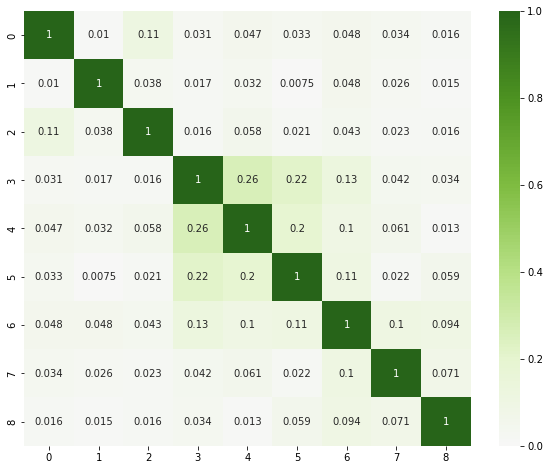

In [179]:
cs = get_cosine_similarity(ti)

In [193]:
list(enumerate(cs))

[(0,
  array([1.        , 0.01043819, 0.11360109, 0.03090218, 0.04737605,
         0.03261983, 0.04794885, 0.03378115, 0.01641575])),
 (1,
  array([0.01043819, 1.        , 0.03800954, 0.01696446, 0.03239053,
         0.0074544 , 0.04848591, 0.02623205, 0.01481435])),
 (2,
  array([0.11360109, 0.03800954, 1.        , 0.01608279, 0.05785488,
         0.02118773, 0.04268155, 0.02318522, 0.01634631])),
 (3,
  array([0.03090218, 0.01696446, 0.01608279, 1.        , 0.26168602,
         0.2181371 , 0.1268574 , 0.04215582, 0.03379103])),
 (4,
  array([0.04737605, 0.03239053, 0.05785488, 0.26168602, 1.        ,
         0.19519251, 0.10081156, 0.06142696, 0.01346957])),
 (5,
  array([0.03261983, 0.0074544 , 0.02118773, 0.2181371 , 0.19519251,
         1.        , 0.10867822, 0.02179294, 0.05875699])),
 (6,
  array([0.04794885, 0.04848591, 0.04268155, 0.1268574 , 0.10081156,
         0.10867822, 1.        , 0.10446016, 0.09444698])),
 (7,
  array([0.03378115, 0.02623205, 0.02318522, 0.04215582, 

In [206]:
def get_similarities_by_distance(array_cosine_similarity):
    container = []
    for i, cosine_similarity in enumerate(array_cosine_similarity):
        row = list(enumerate(cosine_similarity))
        row_sorted = sorted(row, key=lambda x: x[1], reverse=True)
        container.append(row_sorted[1:])
    return container

In [208]:
get_similarities_by_distance(cs)[0]

[(2, 0.11360109296585232),
 (6, 0.04794884811081564),
 (4, 0.047376050800176345),
 (7, 0.03378114753339835),
 (5, 0.03261983130238893),
 (3, 0.030902181628181345),
 (8, 0.01641574625903612),
 (1, 0.010438186083751449)]